In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/cleaned_data_v3.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
0,Residential Apartment,Kolkata South,2.0,3662,0,5,570.5,srijan star swapno puron,NaN,1.0,Amtala,0.191,2,0,0
1,Residential Apartment,Kolkata South,3.0,10500,0,5,1115.5,natural quest,NaN,1.0,EM Bypass,1.175,6,0,0
2,Residential Apartment,Kolkata South,3.0,8900,0,5,1446.0,ganguly 4sight eminence,NaN,1.0,Garia,1.285,5,0,0
3,Residential Apartment,Kolkata South,3.0,5215,0,5,1295.0,dtc sojon,NaN,1.0,Joka,0.675,10,0,0
4,Residential Apartment,Kolkata South,2.0,5108,0,5,920.0,dtc sojon,NaN,1.0,Joka,0.470,10,0,0


In [3]:
df.shape

(6374, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PROPERTY_TYPE        6374 non-null   object 
 1   CITY                 6374 non-null   object 
 2   BEDROOM_NUM          6374 non-null   float64
 3   PRICE_PER_UNIT_AREA  6374 non-null   int64  
 4   FURNISH              6374 non-null   int64  
 5   AGE                  6374 non-null   int64  
 6   AREA                 6374 non-null   float64
 7   SOCIETY_NAME         6214 non-null   object 
 8   BALCONY_NUM          4743 non-null   float64
 9   FLOOR_NUM            6127 non-null   float64
 10  Location             6374 non-null   object 
 11  price                6374 non-null   float64
 12  no_of_landmarks      6374 non-null   int64  
 13  FEATURES_SCORE       6374 non-null   int64  
 14  AMENITIES_SCORE      6374 non-null   int64  
dtypes: float64(5), int64(6), object(4)
mem

### Property Type

<Axes: xlabel='PROPERTY_TYPE'>

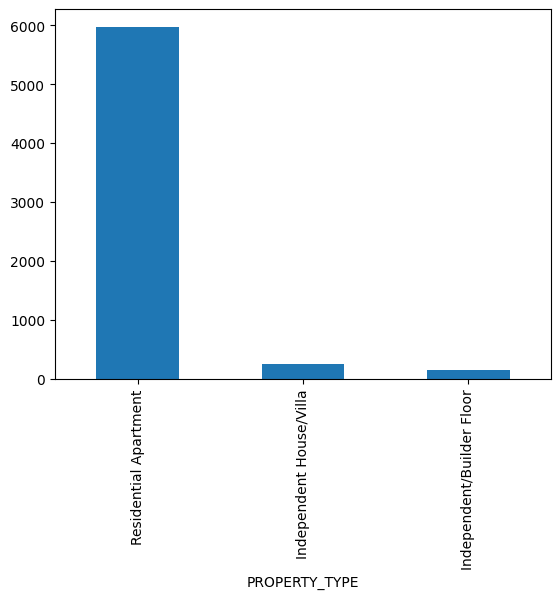

In [5]:
df['PROPERTY_TYPE'].value_counts().plot(kind='bar',)

In [6]:
df['PROPERTY_TYPE'].isnull().sum()

0

#### Observation:

1. Majority of the data come from Residential apartments (~93%). Rest are Independent House/Villa, and Independent/Builder Floor
2. No Missing values

### SOCIETY_NAME

In [7]:
df['SOCIETY_NAME'].value_counts().shape

(1946,)

In [8]:
df['SOCIETY_NAME'].value_counts()

SOCIETY_NAME
on request                        586
magnolia city                      55
ps one 10                          48
southwinds                         48
dtc capital city                   43
                                 ... 
peerless nagar apartment            1
madhymgram basunagar apartment      1
gayatri bhawan complex              1
meghmala apartments                 1
privet                              1
Name: count, Length: 1946, dtype: int64

In [9]:
df[df['SOCIETY_NAME'] != 'on request']['SOCIETY_NAME'].value_counts(normalize=True).cumsum().head(180)

SOCIETY_NAME
magnolia city          0.009773
southwinds             0.018301
ps one 10              0.026830
dtc capital city       0.034471
aagaman by rajat       0.041933
                         ...   
shapoorji palanji      0.497157
the royal ganges       0.498401
bhumi apartment        0.499467
sapurjee sukhobisti    0.500533
magnolia oxygen        0.501599
Name: proportion, Length: 180, dtype: float64

In [10]:
society_counts = df['SOCIETY_NAME'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 1,
 'Average (10-49)': 118,
 'Low (2-9)': 606,
 'Very Low (1)': 1220}

<Axes: xlabel='SOCIETY_NAME'>

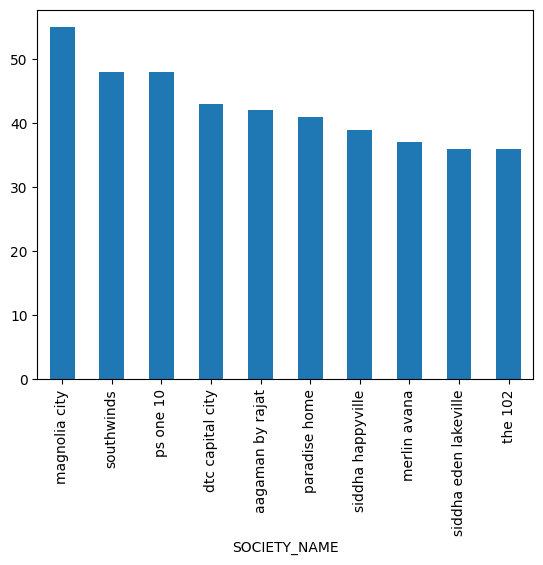

In [11]:
# top 10 socities
df[df['SOCIETY_NAME'] != 'on request']['SOCIETY_NAME'].value_counts().head(10).plot(kind='bar')

In [12]:
df['SOCIETY_NAME'].isnull().sum()

160

#### Observations:

1. Total Societies = 1945
2. Around 30% Properties comes under 'On Request' tag
3. The top 180 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 1765 societies
    - Very High (>100): This is the on request tag which has 586 values.
    - High (50-100): 1 societies have between 50 to 100 listings.
    - Average (10-49): 118 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 606 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 1220 societies, have only 1 listing.
4. 160 missing values

### City

In [13]:
df['CITY'].value_counts().shape

(5,)

In [14]:
df['CITY'].value_counts()

CITY
Kolkata South      2658
Kolkata East       2059
Kolkata North      1389
Kolkata West        215
Kolkata Central      53
Name: count, dtype: int64

<Axes: xlabel='CITY'>

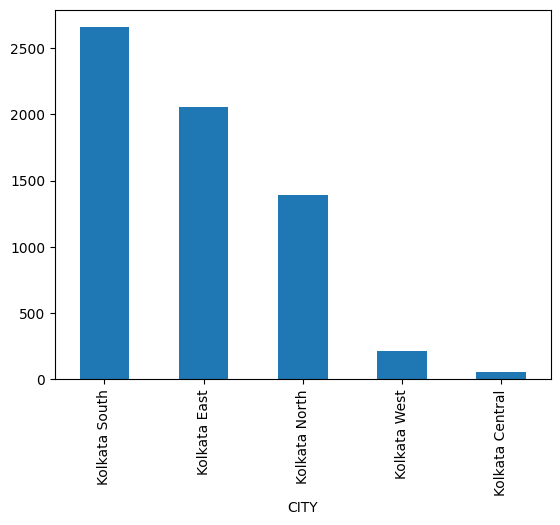

In [15]:
df['CITY'].value_counts().plot(kind='bar')

In [16]:
df['CITY'].isnull().sum()

0

#### Observation:
1. 5 zones in Kolkata
2. Majority (~95%) of the Apartments are coming from Kolkata South, East and North
3. No Missing Values

### Location

In [17]:
df['Location'].value_counts().shape

(441,)

In [18]:
df['Location'].value_counts()

Location
New Town               952
Rajarhat               516
Tollygunge             305
EM Bypass              277
Joka                   227
                      ... 
Budherhat                1
Nandan Nagar             1
hindustha road           1
new alipore block G      1
Dhamaitala               1
Name: count, Length: 441, dtype: int64

<Axes: xlabel='Location'>

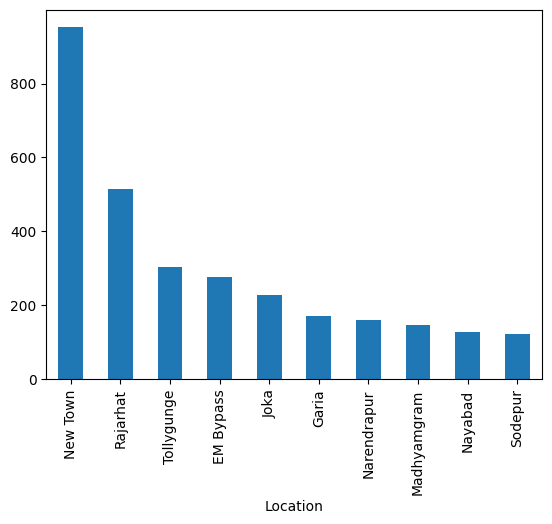

In [19]:
df['Location'].value_counts().head(10).plot(kind='bar')

In [20]:
loc_counts = df['Location'].value_counts()

loc_frequency_bins = {
    "Very High (>100)": (loc_counts > 100).sum(),
    "High (50-100)": ((loc_counts >= 50) & (loc_counts <= 100)).sum(),
    "Average (10-49)": ((loc_counts >= 10) & (loc_counts < 50)).sum(),
    "Low (2-9)": ((loc_counts > 1) & (loc_counts < 10)).sum(),
    "Very Low (1)": (loc_counts == 1).sum()
}

loc_frequency_bins

{'Very High (>100)': 12,
 'High (50-100)': 11,
 'Average (10-49)': 74,
 'Low (2-9)': 162,
 'Very Low (1)': 182}

#### Observation:
1. There are a total of 441 unique Area/Location of Kolkata in the dataset.
2. Frequency distribution of Areas/Locations:
    - Very High (>100): 12 locations have more than 100 listings.
    - High (50-100): 11 locations have between 50 to 100 listings.
    - Average (10-49): 74 locations have between 10 to 49 listings.
    - Low (2-9): 162 locations have between 2 to 9 listings.
    - Very Low (1): 182 locations have only 1 listing.
3. Newtown has the maximum number of listings

### Price

In [21]:
df['price'].isnull().sum()

0

In [22]:
df['price'].describe()

count    6374.000000
mean        1.510626
std         4.965066
min         0.050000
25%         0.374000
50%         0.622975
75%         1.100000
max        60.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

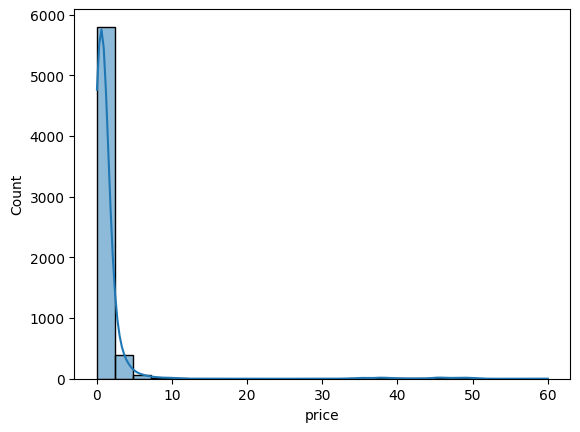

In [27]:
sns.histplot(df['price'], kde=True, bins=25)

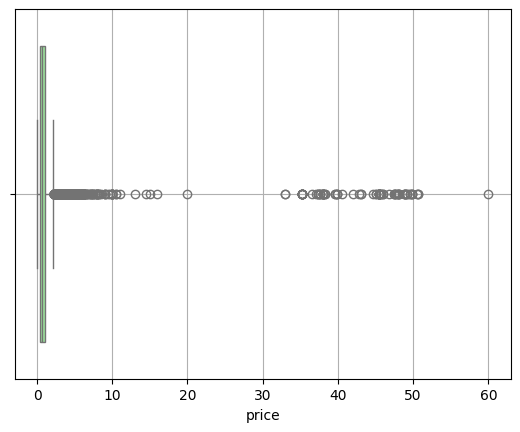

In [24]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

**Descriptive Statistics:**

- Count: There are a total of 6374 price entries.
- Mean Price: The average price is approximately 1.51 crores.
- Median Price: The median (or 50th percentile) price is 0.62 crores or 62 Lakhs.
- Standard Deviation: The prices have a standard deviation of 4.96, indicating variability in the prices.
- Range: Prices range from a minimum of 0.05 crores(5 Lakhs) to a maximum of 60 crores.
- IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.37 crores to 1.1 crores.

**Visualizations:**

- Distribution: The histogram indicates that most properties are priced in the lower range (below 4 crores), with a few properties going beyond 10 crores.
- Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

- **Missing Values:** 0.

In [28]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

8.128809563410437 68.30252323295501


**Skewness:** The price distribution has a skewness of approximately 8.12, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a very-few high-priced properties.

**Kurtosis:** The kurtosis value is approximately 68.3. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [30]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.144892
0.05     0.210000
0.95     3.458750
0.99    37.655000
Name: price, dtype: float64

**Quantile Analysis:**

- 1% Quantile: Only 1% of properties are priced below 0.14 crores or 14 Lakhs.
- 5% Quantile: 5% of properties are priced below 0.21 crores or 21 Lakhs.
- 95% Quantile: 95% of properties are priced below 3.45 crores.
- 99% Quantile: 99% of properties are priced below 37.65 crores.

In [31]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

0.7260000000000001

In [32]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-0.7150000000000002 2.189


In [33]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(645, 15)

In [34]:
outliers['price'].describe()

count    645.000000
mean       8.906488
std       13.466660
min        2.195000
25%        2.700000
50%        3.410000
75%        5.400000
max       60.000000
Name: price, dtype: float64

**Outliers Analysis (using IQR method):**

- Based on the IQR method, there are 645 properties considered as outliers.
- These outliers have an average price of approximately 8.9 crores.
- The range for these outliers is from 2.19 crores to 60 crores.

<Axes: xlabel='price'>

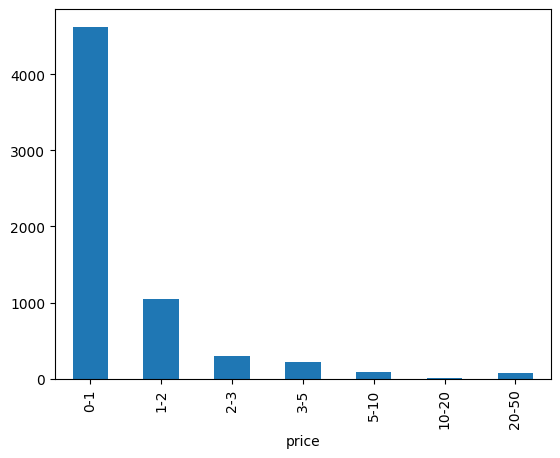

In [35]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "0-1 crores" and "1-2 crores" ranges.

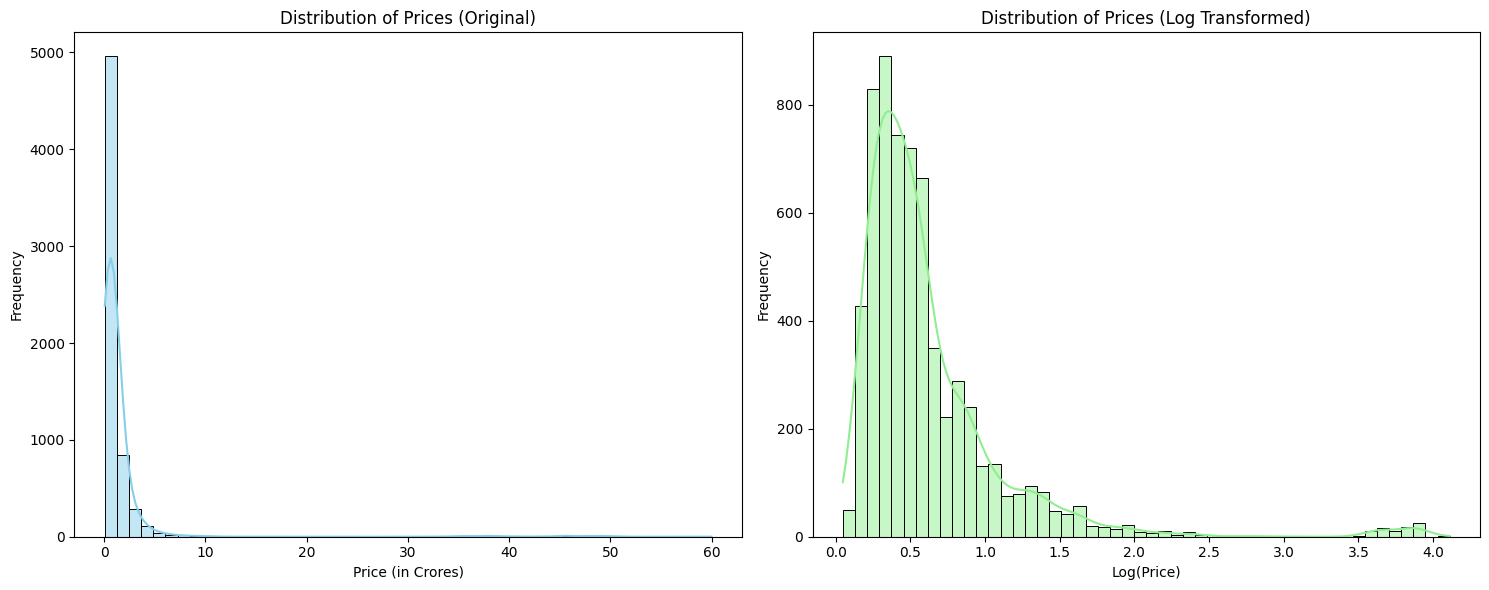

In [46]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [37]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

3.397371588551283 15.991473070911562


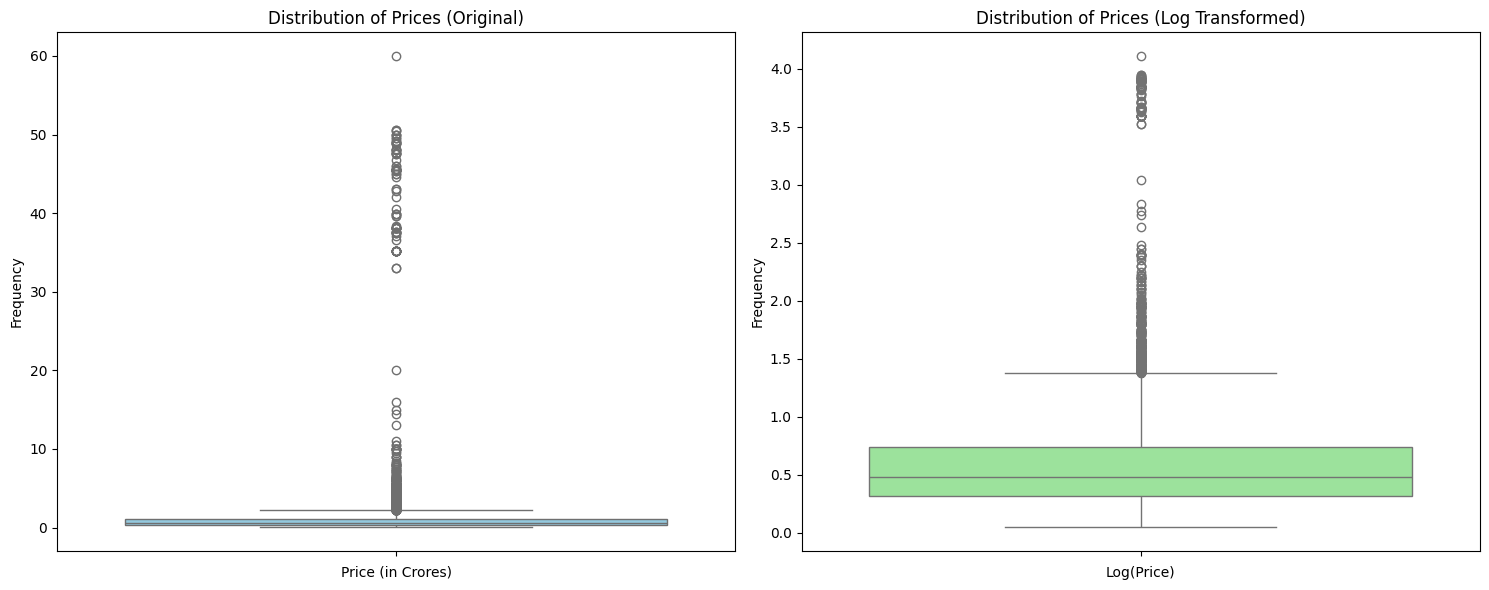

In [38]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Price per Unit Area (Sq.ft)

In [39]:
df['PRICE_PER_UNIT_AREA'].isnull().sum()

0

In [47]:
df['PRICE_PER_UNIT_AREA'].describe().apply(lambda x: format(x, 'f'))

count         6374.000000
mean         93147.527298
std        1740787.095113
min              0.000000
25%           4069.500000
50%           5555.000000
75%           8000.000000
max      120000000.000000
Name: PRICE_PER_UNIT_AREA, dtype: object

In [49]:
df[df['PRICE_PER_UNIT_AREA'] == 0.0]

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
2852,Residential Apartment,Kolkata North,2.0,0,2,5,2581176.0,mihir kunja,1.0,2.0,Sodepur,0.257,4,0,0


<Axes: xlabel='PRICE_PER_UNIT_AREA', ylabel='Count'>

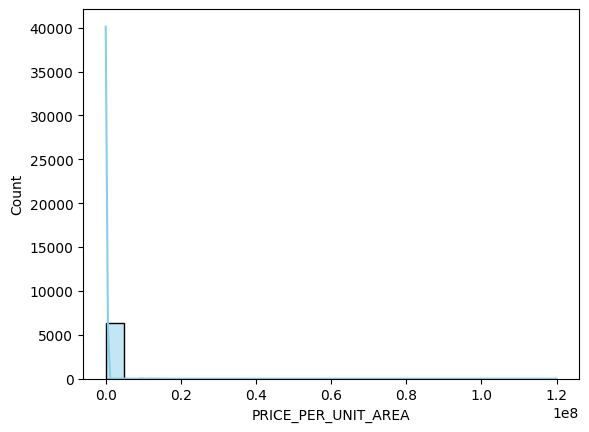

In [55]:
sns.histplot(df['PRICE_PER_UNIT_AREA'],bins=25,color='skyblue', kde=True)

<Axes: ylabel='PRICE_PER_UNIT_AREA'>

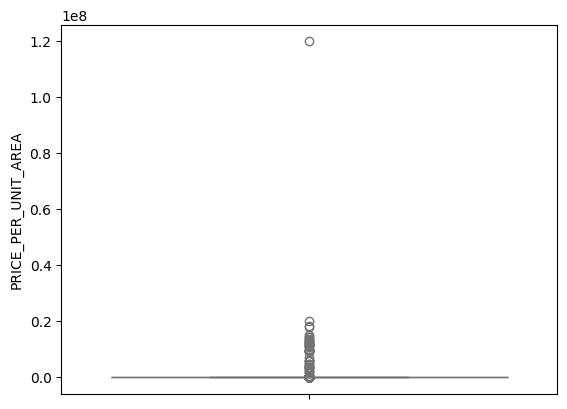

In [56]:
sns.boxplot(df['PRICE_PER_UNIT_AREA'], color='lightgreen')

#### Observations:
1. The mean price/sq.ft is 93147.52 which is insane.
2. The Standard Deviation is also very very high (1740787.09)
3. The Median Price is 5555.00 which is understandable
4. One apartment has a value of 0. It is definitely a Data Error.
5. The histogram and boxplot clearly shows the presence of Outliers
6. No missing values

### Bedroom

In [57]:
df['BEDROOM_NUM'].isnull().sum()

0

<Axes: xlabel='BEDROOM_NUM'>

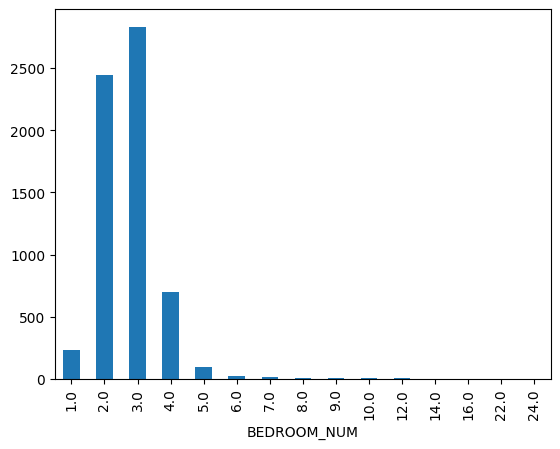

In [58]:
df['BEDROOM_NUM'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

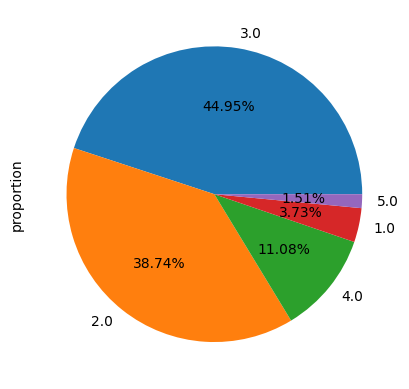

In [59]:
df['BEDROOM_NUM'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

#### Observations:
1. No Missing value
2. 44.95% properties has 3 Bedroom

### Balcony

In [60]:
df['BALCONY_NUM'].isnull().sum()

1631

<Axes: xlabel='BALCONY_NUM'>

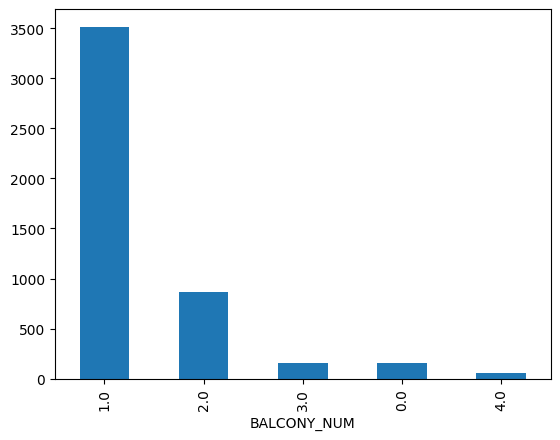

In [61]:
df['BALCONY_NUM'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

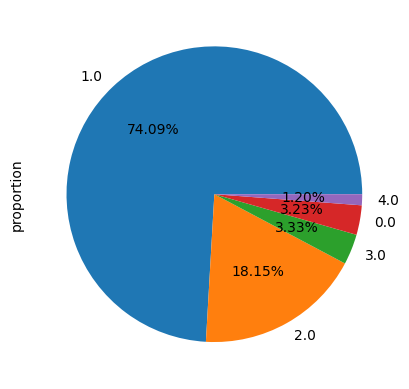

In [62]:
df['BALCONY_NUM'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

#### Observation:
1. 1631 Missing Values
2. 74.09% properties have 1 Balcony

### Floor Number

In [63]:
df['FLOOR_NUM'].isnull().sum()

247

In [64]:
df['FLOOR_NUM'].describe()

count    6127.000000
mean        3.830096
std         4.545919
min        -1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        34.000000
Name: FLOOR_NUM, dtype: float64

<Axes: xlabel='FLOOR_NUM'>

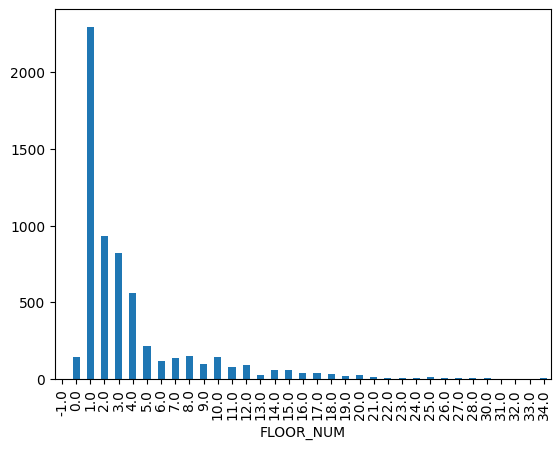

In [65]:
df['FLOOR_NUM'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='FLOOR_NUM'>

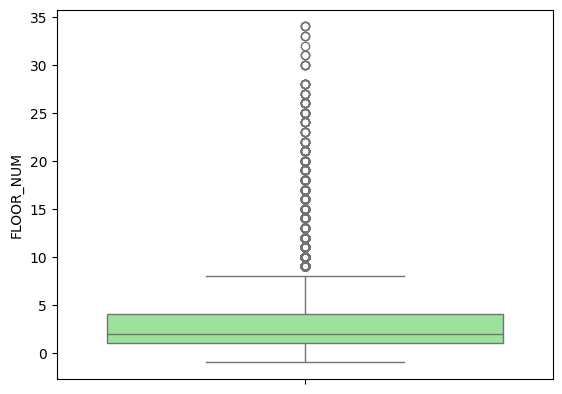

In [67]:
sns.boxplot(df['FLOOR_NUM'], color='lightgreen')

### Observations:

- The majority of the properties lie between the ground floor (0) and the 10th floor.
- Floors 0 to 5 are particularly common, with the 1st floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 1st and 4th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

### Age

In [68]:
df['AGE'].isnull().sum()

0

In [69]:
df['AGE'].value_counts()

AGE
1    2202
5    2036
6    1013
2     685
3     438
Name: count, dtype: int64

<Axes: xlabel='AGE'>

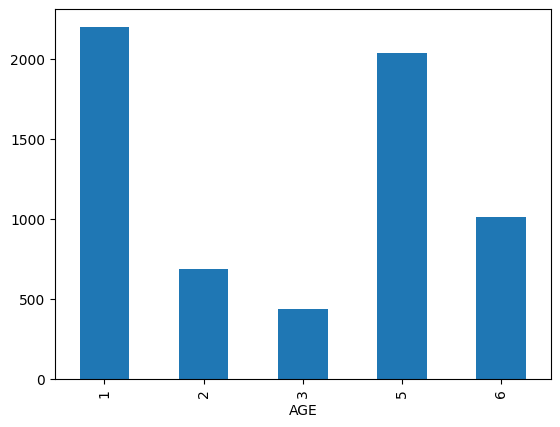

In [70]:
df['AGE'].value_counts().sort_index().plot(kind='bar')

### Area

In [71]:
df['AREA'].isnull().sum()

0

In [74]:
df['AREA'].describe().apply(lambda x: format(x, 'f'))

count       6374.000000
mean        2169.457091
std        49492.945420
min            1.000000
25%          865.250000
50%         1105.500000
75%         1476.000000
max      2994000.000000
Name: AREA, dtype: object

In [76]:
df[df['AREA'] == df['AREA'].min()]

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
3043,Independent House/Villa,Kolkata East,4.0,6333333,2,5,1.0,greentech city vedic wellness villas,2.0,NaN,Rajarhat,0.95,7,12,51


In [86]:
df[df['AREA'] == df['AREA'].max()]

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
6045,Residential Apartment,Kolkata East,2.0,1,2,1,2994000.0,anandi residency,1.0,3.0,Rajarhat,0.2994,5,8,47


In [96]:
# Quantile Analysis
quantiles = df['AREA'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     437.00
0.05     613.65
0.95    2585.55
0.99    4283.50
Name: AREA, dtype: float64

<Axes: ylabel='AREA'>

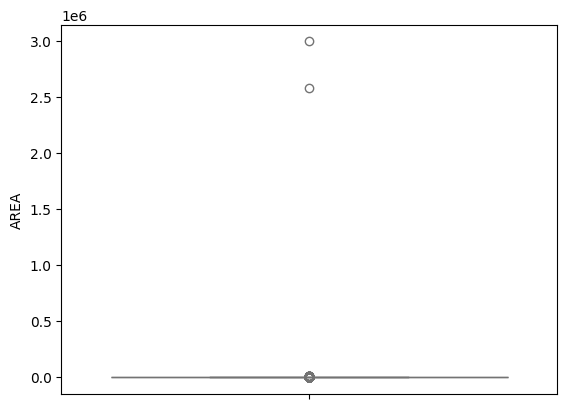

In [97]:
sns.boxplot(df['AREA'], color='lightgreen')

<Axes: ylabel='AREA'>

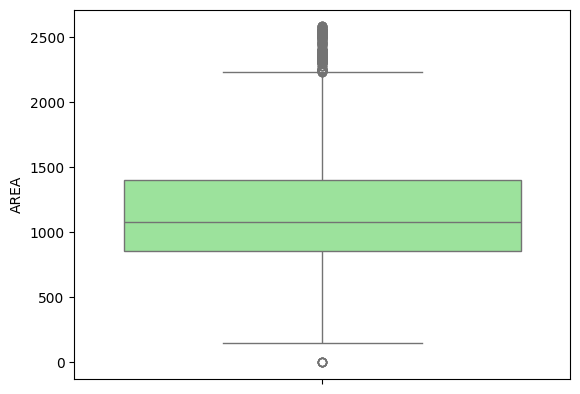

In [100]:
# Remove the outlier points by filtering the column
filtered_df = df[df['AREA'] < df['AREA'].quantile(0.95)]

# Plot the boxplot without the outlier points using Seaborn
sns.boxplot(data=filtered_df, y='AREA',color='lightgreen')

### Observation:
1. The Mean AREA value is 2169.45 sq.ft
2. The Minimum value is 1.0, this could be a data error
3. The Maximum value is 2994000.00, this is also could be a Data error
4. The Median Area value is 1105.50
5. 99% properties are below 4283.5 sq.ft

### Furnish

In [101]:
df['FURNISH'].value_counts()

FURNISH
2    3659
0    1882
4     571
1     262
Name: count, dtype: int64

0 -> Not Availble

1 -> Furnished

2 -> UnFurnished

4 -> SemiFurnished

<Axes: ylabel='count'>

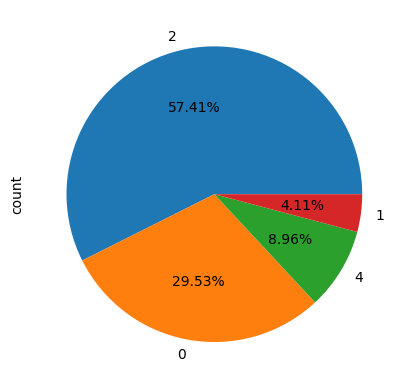

In [102]:
df['FURNISH'].value_counts().plot(kind='pie',autopct='%0.2f%%')

#### Observations:
1. Most of the apartments (57.41%) are unfurnished
2. Very few apartments are fully furnished (4.11%)
3. We don't have any data of Furnishing about 29.53% properties

### No. of Landmarks

In [103]:
df['no_of_landmarks'].isnull().sum()

0

<Axes: xlabel='no_of_landmarks'>

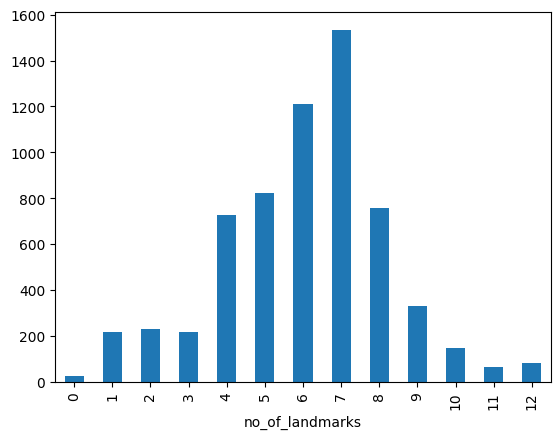

In [105]:
df['no_of_landmarks'].value_counts().sort_index().plot(kind='bar')

### Observation:
1. No Missing values
2. Most of the apartments have 4-8 landmarks

### Features Score

In [106]:
df['FEATURES_SCORE'].isnull().sum()

0

In [108]:
df['FEATURES_SCORE'].describe()

count    6374.000000
mean       18.115155
std        20.674494
min         0.000000
25%         0.000000
50%         8.000000
75%        31.000000
max        72.000000
Name: FEATURES_SCORE, dtype: float64

<Axes: xlabel='FEATURES_SCORE', ylabel='Count'>

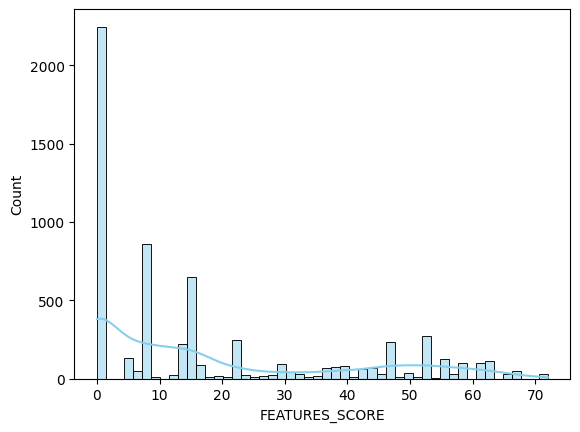

In [109]:
sns.histplot(df['FEATURES_SCORE'], bins=50, color='skyblue', kde=True)

#### Observations:
1. The mean feature score is 18.11
2. 50% of the properties has a feature score of below 8

### Amenities Score

In [112]:
df['AMENITIES_SCORE'].isnull().sum()

0

In [113]:
df['AMENITIES_SCORE'].describe()

count    6374.000000
mean       36.978036
std        37.753432
min         0.000000
25%         0.000000
50%        27.000000
75%        59.000000
max       150.000000
Name: AMENITIES_SCORE, dtype: float64

<Axes: xlabel='AMENITIES_SCORE', ylabel='Count'>

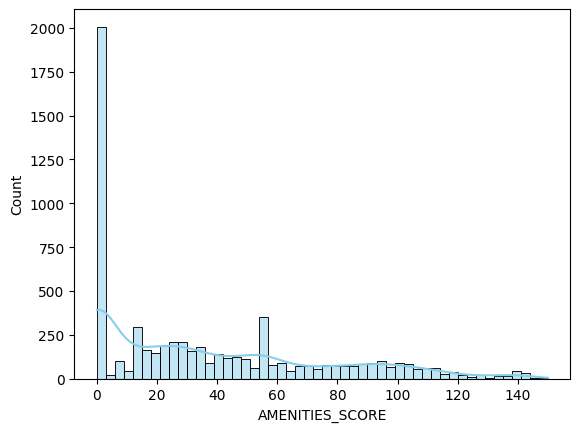

In [114]:
sns.histplot(df['AMENITIES_SCORE'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='AMENITIES_SCORE'>

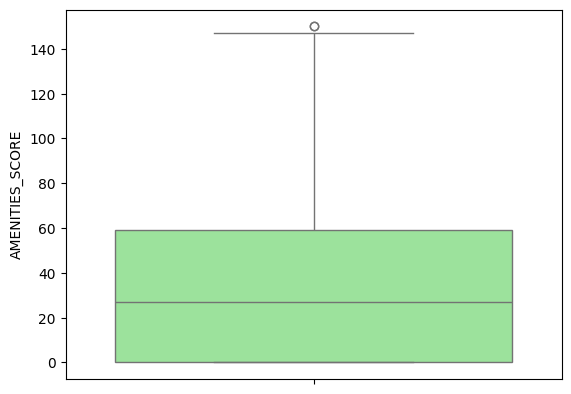

In [115]:
sns.boxplot(df['AMENITIES_SCORE'], color='lightgreen')

#### Observation:
1. The Distribution is very similar to the Features score.
2. The average Amenities score is 36.97
3. The max amenities score is 150.00
4. The Amenities score of most of the properties lies between 0 to 60 